In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
print(os.listdir("../input/pollendataset/PollenDataset"))

['Read.ipynb', 'images', 'Read-skimage.ipynb', 'README.md', 'pollen_data.csv']


In [3]:
images = get_image_files("../input/pollendataset/PollenDataset/images")

In [4]:
def get_labels(f_path): return 'N' if 'N' in str(f_path) else 'P'

In [5]:
f_path = "../input/pollendataset/PollenDataset/images"
bs = 64
tfms = get_transforms(flip_vert=False, max_zoom=1.)
data = ImageDataBunch.from_name_func(f_path, images, label_func=get_labels, ds_tfms=tfms, size=224, bs=bs
                                    ).normalize(imagenet_stats)

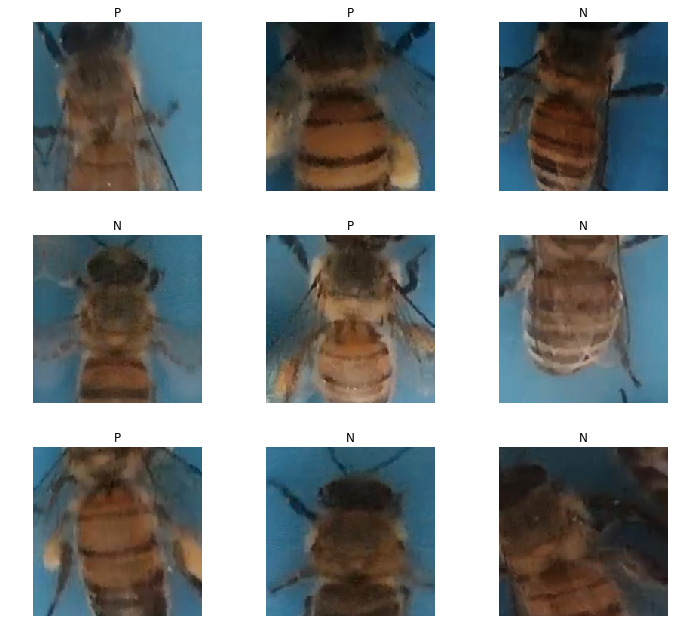

In [6]:
data.show_batch(rows=3, figsize=(10,9))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['N', 'P'], 2, 572, 142)

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, model_dir='/kaggle/working')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:05, 17932884.06it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


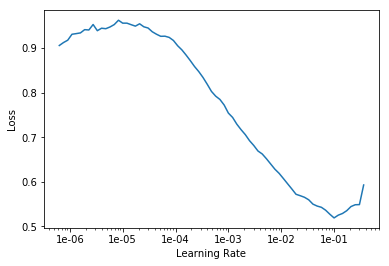

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
lr = 0.01

In [11]:
learn.fit_one_cycle(7, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.570014,0.397865,0.204225,00:07
1,0.475584,0.498708,0.161972,00:06
2,0.407330,0.422333,0.140845,00:06
3,0.369158,0.369779,0.119718,00:07
4,0.323995,0.331538,0.133803,00:06
5,0.290992,0.300293,0.133803,00:06
6,0.257951,0.292830,0.133803,00:06


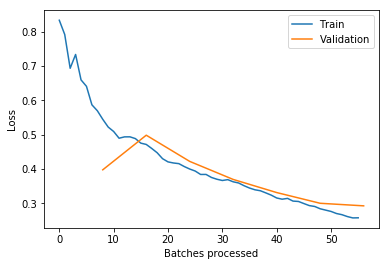

In [12]:
learn.recorder.plot_losses()

In [13]:
learn.save('stage-1-rn50')

In [14]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


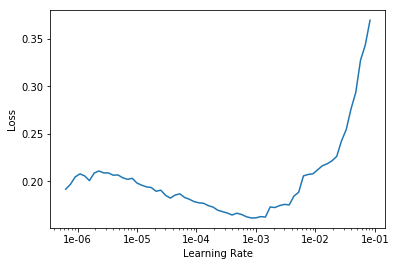

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(5, slice(1e-4, 0.0007))

epoch,train_loss,valid_loss,error_rate,time
0,0.207485,0.346320,0.154930,00:06
1,0.190582,0.274436,0.084507,00:06
2,0.170393,0.224594,0.091549,00:06
3,0.141124,0.147162,0.077465,00:06
4,0.137314,0.142407,0.084507,00:06


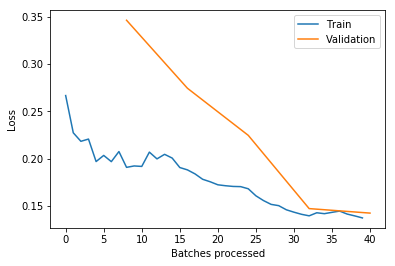

In [17]:
learn.recorder.plot_losses()

In [18]:
learn.save('stage-2-rn50')

## Increasing size of images

In [19]:
data2 = ImageDataBunch.from_name_func(f_path, images, label_func=get_labels, ds_tfms=tfms, size=299, bs=bs
                                    ).normalize(imagenet_stats)

In [20]:
learn.data = data2

In [21]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


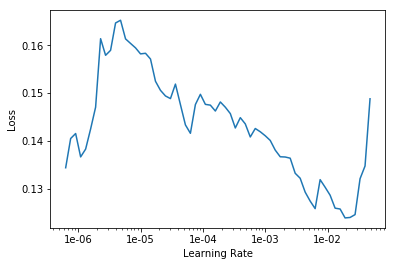

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
lr = 1e-3/2

In [24]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.125493,0.086163,0.028169,00:12
1,0.122544,0.081894,0.028169,00:09
2,0.123199,0.087939,0.028169,00:10
3,0.123781,0.092409,0.035211,00:10
4,0.124218,0.099716,0.035211,00:09


In [25]:
learn.save('stage-1-299-rn50')

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.149607,0.122892,0.056338,00:10
1,0.135846,0.143438,0.063380,00:10
2,0.116662,0.113300,0.056338,00:10
3,0.108509,0.095226,0.049296,00:10
4,0.094540,0.092707,0.042254,00:10


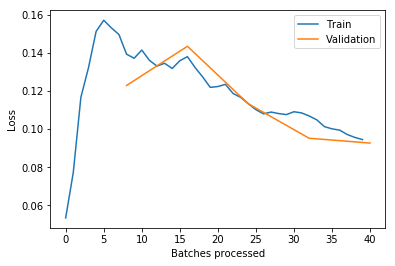

In [28]:
learn.recorder.plot_losses()

## Interpretation

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

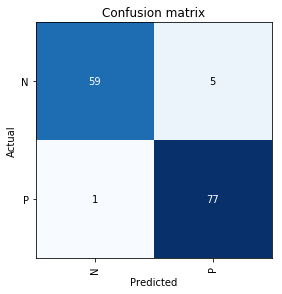

In [30]:
interp.plot_confusion_matrix()

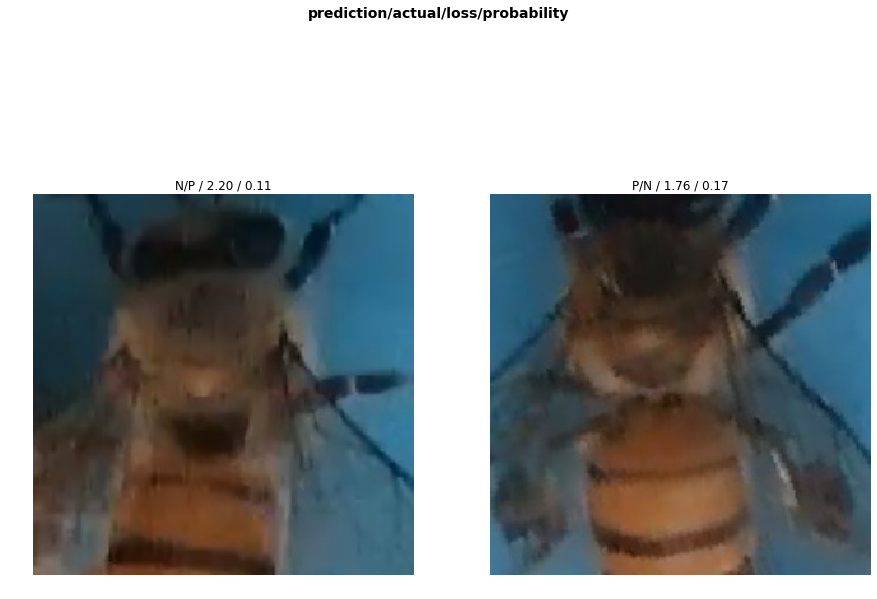

In [31]:
interp.plot_top_losses(2, figsize=(15,11), heatmap=False)